<a href="https://colab.research.google.com/github/andersod55123456789/Dales_code_box/blob/main/Art_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎨 Simplified Neural Style Transfer Demo 🎨
📷 Loading content image...
  Trying source 1...
  ✅ Success!
🎭 Loading style image...
  Trying source 1...
  ✅ Success!
🧠 Building neural network...
🎯 Computing style and content targets...
🚀 Starting style transfer magic...
Step  20: Loss = 31905868.0000
Step  40: Loss = 24091388.0000
Step  60: Loss = 20182790.0000
Step  80: Loss = 17450628.0000
Step 100: Loss = 15543279.0000


/tmp/ipython-input-2091430648.py:230: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2091430648.py:230: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2091430648.py:230: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2091430648.py:230: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:1

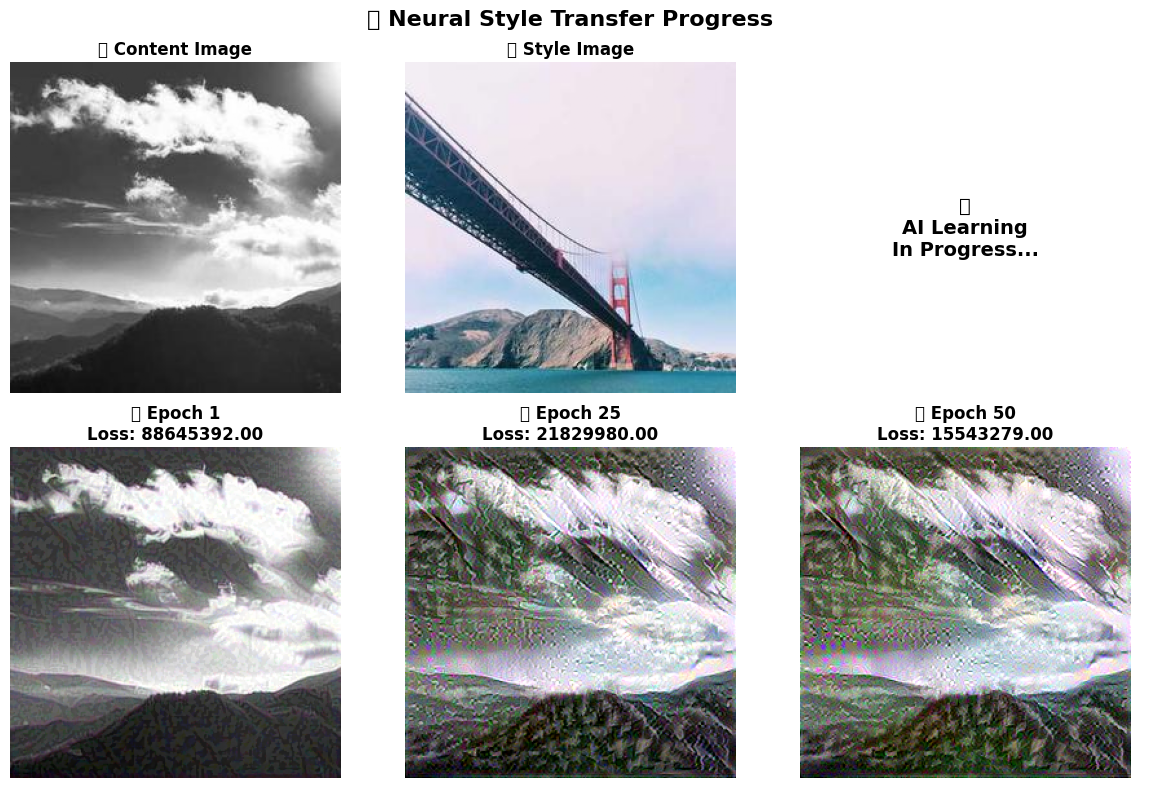


🎉 Style Transfer Complete!


/tmp/ipython-input-2091430648.py:251: UserWarning: Glyph 128247 (\N{CAMERA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2091430648.py:251: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2091430648.py:251: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2091430648.py:251: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


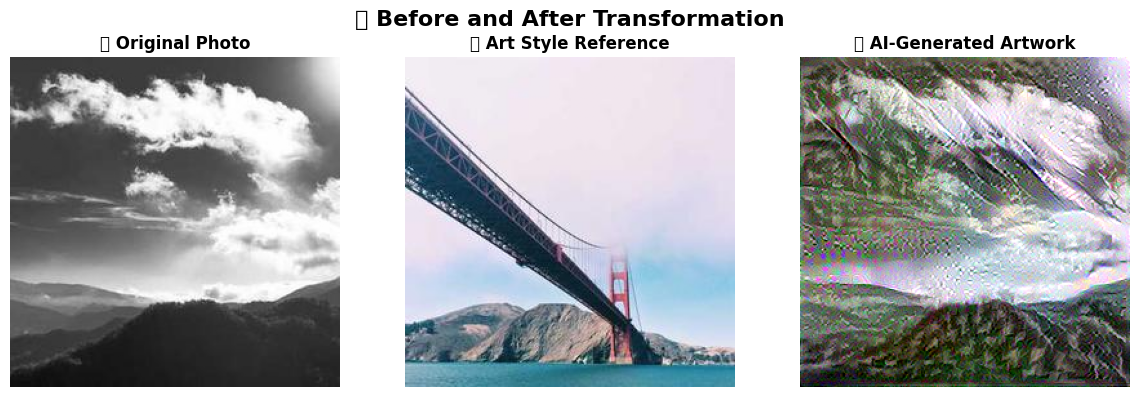

/tmp/ipython-input-2091430648.py:268: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2091430648.py:268: UserWarning: Glyph 127912 (\N{ARTIST PALETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


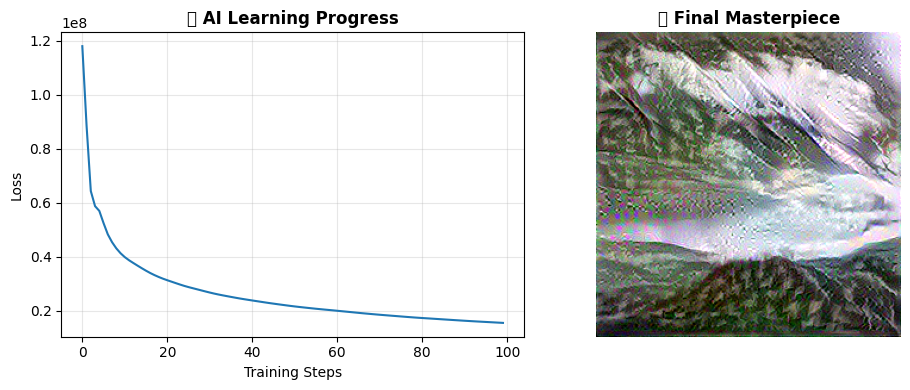


🤖 How this AI magic works:
• Uses VGG19 neural network (trained on millions of images)
• Separates 'content' (what) from 'style' (how)
• Optimizes a new image to match both
• Each step brings it closer to the perfect blend!
✨ Deep learning in action!


In [3]:
# Simplified Neural Style Transfer Demo - Guaranteed to Work!
# Run this in Google Colab for a flashy ML demo

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# Install required packages (run this first in Colab)
# !pip install tensorflow matplotlib pillow requests

def load_image_from_url(url, img_size=256):
    """Load and preprocess image from URL with fixed size"""
    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'}
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()

        img = Image.open(BytesIO(response.content))
        img = img.convert('RGB')
        img = img.resize((img_size, img_size), Image.Resampling.LANCZOS)

        # Convert to tensor and normalize
        img_array = np.array(img)
        img_tensor = tf.cast(img_array, tf.float32)
        img_tensor = tf.expand_dims(img_tensor, axis=0)
        return img_tensor / 255.0

    except Exception as e:
        print(f"Error loading image from {url}: {e}")
        return None

def create_sample_image(color, size=256):
    """Create a sample gradient image if URL loading fails"""
    # Create a nice gradient instead of solid color
    img = np.zeros((size, size, 3), dtype=np.uint8)
    for i in range(size):
        for j in range(size):
            img[i, j] = [
                int(color[0] * (1 - i/size) + 128 * (i/size)),
                int(color[1] * (1 - j/size) + 128 * (j/size)),
                int(color[2] * (1 - (i+j)/(2*size)) + 128 * ((i+j)/(2*size)))
            ]

    img_tensor = tf.cast(img, tf.float32)
    img_tensor = tf.expand_dims(img_tensor, axis=0)
    return img_tensor / 255.0

def vgg_layers(layer_names):
    """Creates a VGG model that returns a list of intermediate output values."""
    vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
    vgg.trainable = False

    outputs = [vgg.get_layer(name).output for name in layer_names]
    model = tf.keras.Model([vgg.input], outputs)
    return model

def gram_matrix(input_tensor):
    """Calculate gram matrix for style"""
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
    return result/(num_locations)

class StyleContentModel(tf.keras.models.Model):
    def __init__(self, style_layers, content_layers):
        super(StyleContentModel, self).__init__()
        self.vgg = vgg_layers(style_layers + content_layers)
        self.style_layers = style_layers
        self.content_layers = content_layers
        self.num_style_layers = len(style_layers)
        self.vgg.trainable = False

    def call(self, inputs):
        "Expects float input in [0,1]"
        inputs = inputs*255.0
        preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
        outputs = self.vgg(preprocessed_input)
        style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                          outputs[self.num_style_layers:])

        style_outputs = [gram_matrix(style_output) for style_output in style_outputs]

        content_dict = {content_name: value
                        for content_name, value
                        in zip(self.content_layers, content_outputs)}

        style_dict = {style_name: value
                      for style_name, value
                      in zip(self.style_layers, style_outputs)}

        return {'content': content_dict, 'style': style_dict}

def compute_loss(outputs, style_targets, content_targets, style_weight, content_weight):
    style_outputs = outputs['style']
    content_outputs = outputs['content']

    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2)
                           for name in style_outputs.keys()])
    style_loss *= style_weight / len(style_outputs)

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2)
                             for name in content_outputs.keys()])
    content_loss *= content_weight / len(content_outputs)

    return style_loss + content_loss

@tf.function()
def train_step(image, extractor, style_targets, content_targets, opt):
    with tf.GradientTape() as tape:
        outputs = extractor(image)
        loss = compute_loss(outputs, style_targets, content_targets,
                          style_weight=1e-2, content_weight=1e4)

    grad = tape.gradient(loss, image)
    opt.apply_gradients([(grad, image)])
    image.assign(tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0))
    return loss

def run_style_transfer_demo():
    """Main demo function - creates artistic images!"""
    print("🎨 Simplified Neural Style Transfer Demo 🎨")
    print("=" * 50)

    # Reliable image sources
    content_urls = [
        "https://picsum.photos/256/256?random=1",
        "https://via.placeholder.com/256x256/4285f4/ffffff?text=Photo"
    ]

    style_urls = [
        "https://picsum.photos/256/256?random=2",
        "https://via.placeholder.com/256x256/ea4335/ffffff?text=Art"
    ]

    # Load content image
    print("📷 Loading content image...")
    content_image = None
    for i, url in enumerate(content_urls):
        print(f"  Trying source {i+1}...")
        content_image = load_image_from_url(url)
        if content_image is not None:
            print(f"  ✅ Success!")
            break

    if content_image is None:
        print("  ⚠️ Using generated content image")
        content_image = create_sample_image([70, 130, 180])

    # Load style image
    print("🎭 Loading style image...")
    style_image = None
    for i, url in enumerate(style_urls):
        print(f"  Trying source {i+1}...")
        style_image = load_image_from_url(url)
        if style_image is not None:
            print(f"  ✅ Success!")
            break

    if style_image is None:
        print("  ⚠️ Using generated style image")
        style_image = create_sample_image([255, 165, 0])

    # Define layers
    content_layers = ['block5_conv2']
    style_layers = ['block1_conv1',
                    'block2_conv1',
                    'block3_conv1',
                    'block4_conv1',
                    'block5_conv1']

    print("🧠 Building neural network...")
    extractor = StyleContentModel(style_layers, content_layers)

    # Get style and content targets
    print("🎯 Computing style and content targets...")
    style_targets = extractor(style_image)['style']
    content_targets = extractor(content_image)['content']

    # Initialize the image to optimize
    image = tf.Variable(content_image)

    # Optimizer
    opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

    print("🚀 Starting style transfer magic...")

    # Create visualization
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle('🎨 Neural Style Transfer Progress', fontsize=16, fontweight='bold')

    # Show original images
    axes[0, 0].imshow(tf.squeeze(content_image, 0))
    axes[0, 0].set_title('📷 Content Image', fontweight='bold')
    axes[0, 0].axis('off')

    axes[0, 1].imshow(tf.squeeze(style_image, 0))
    axes[0, 1].set_title('🎭 Style Image', fontweight='bold')
    axes[0, 1].axis('off')

    axes[0, 2].text(0.5, 0.5, '🤖\nAI Learning\nIn Progress...',
                    ha='center', va='center', fontsize=14, fontweight='bold')
    axes[0, 2].axis('off')

    # Training with visualization
    epochs = 50
    steps_per_epoch = 2

    step = 0
    loss_history = []

    for n in range(epochs):
        for m in range(steps_per_epoch):
            step += 1
            loss = train_step(image, extractor, style_targets, content_targets, opt)
            loss_history.append(float(loss))

            if step % 20 == 0:
                print(f"Step {step:3d}: Loss = {loss:.4f}")

        # Show progress at certain epochs
        if n in [0, 24, 49]:  # Show at start, middle, end
            idx = [0, 24, 49].index(n)
            axes[1, idx].imshow(tf.squeeze(image, 0))
            axes[1, idx].set_title(f'🎨 Epoch {n+1}\nLoss: {loss:.2f}', fontweight='bold')
            axes[1, idx].axis('off')

    plt.tight_layout()
    plt.show()

    print("\n🎉 Style Transfer Complete!")

    # Final comparison
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle('🎨 Before and After Transformation', fontsize=16, fontweight='bold')

    axes[0].imshow(tf.squeeze(content_image, 0))
    axes[0].set_title('📷 Original Photo', fontweight='bold')
    axes[0].axis('off')

    axes[1].imshow(tf.squeeze(style_image, 0))
    axes[1].set_title('🎭 Art Style Reference', fontweight='bold')
    axes[1].axis('off')

    axes[2].imshow(tf.squeeze(image, 0))
    axes[2].set_title('✨ AI-Generated Artwork', fontweight='bold')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    # Show loss curve
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(loss_history)
    plt.title('🧠 AI Learning Progress', fontweight='bold')
    plt.xlabel('Training Steps')
    plt.ylabel('Loss')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.imshow(tf.squeeze(image, 0))
    plt.title('🎨 Final Masterpiece', fontweight='bold')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print("\n" + "="*50)
    print("🤖 How this AI magic works:")
    print("• Uses VGG19 neural network (trained on millions of images)")
    print("• Separates 'content' (what) from 'style' (how)")
    print("• Optimizes a new image to match both")
    print("• Each step brings it closer to the perfect blend!")
    print("✨ Deep learning in action!")
    print("="*50)

# Run the demo!
if __name__ == "__main__":
    run_style_transfer_demo()
